In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

0.027743545709677415
ACC_DEVIATION=0.00897206118870765
BARO_DEVIATION=0.28588015486894514


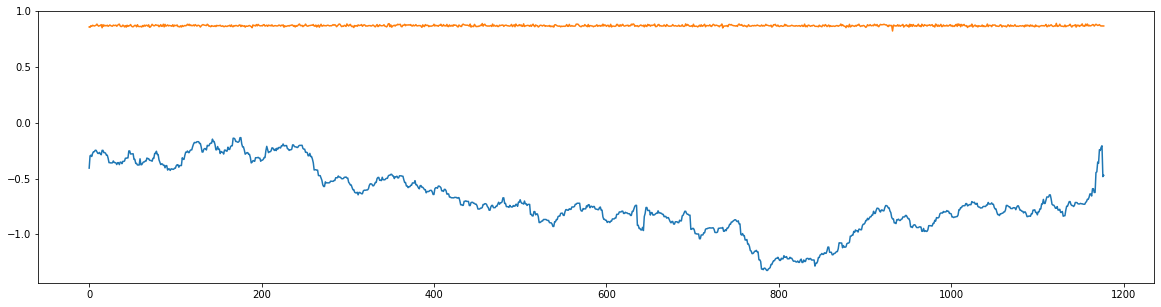

In [2]:
data = pd.read_csv("height_static.csv", delimiter=";")

print(data['sensors.accelerometer.vertical'].mean())

ACC_DEVIATION = data['sensors.accelerometer.vertical'].std()
BARO_DEVIATION = data['sensors.barometer.height'].std()

print(f'{ACC_DEVIATION=}')
print(f'{BARO_DEVIATION=}')

fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
ax.plot(data['sensors.barometer.height'])
ax.plot(data['sensors.ultrasound.height'])
plt.show()


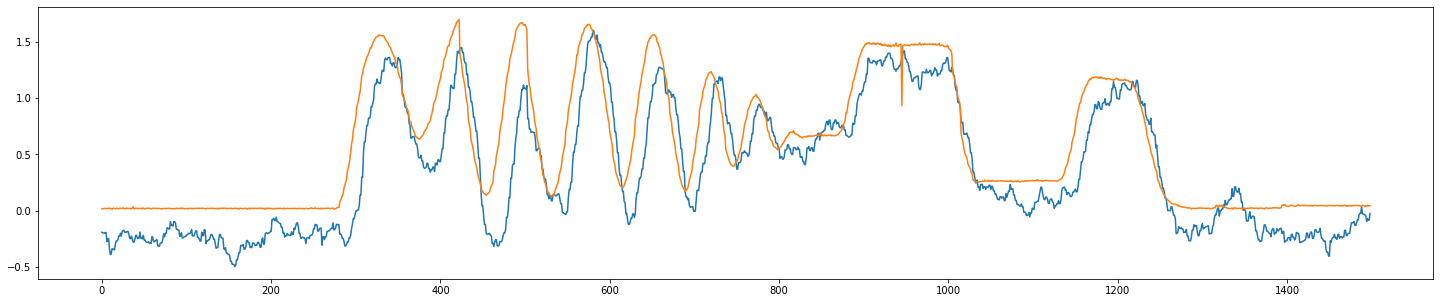

In [4]:
data = pd.read_csv("height_dynamic.csv", delimiter=";")

fig, ax = plt.subplots()
fig.set_size_inches(25, 5)
ax.plot(data['sensors.barometer.height'])
ax.plot(data['sensors.ultrasound.height'])
plt.show()

[[0.01 0.  ]
 [0.   0.01]]


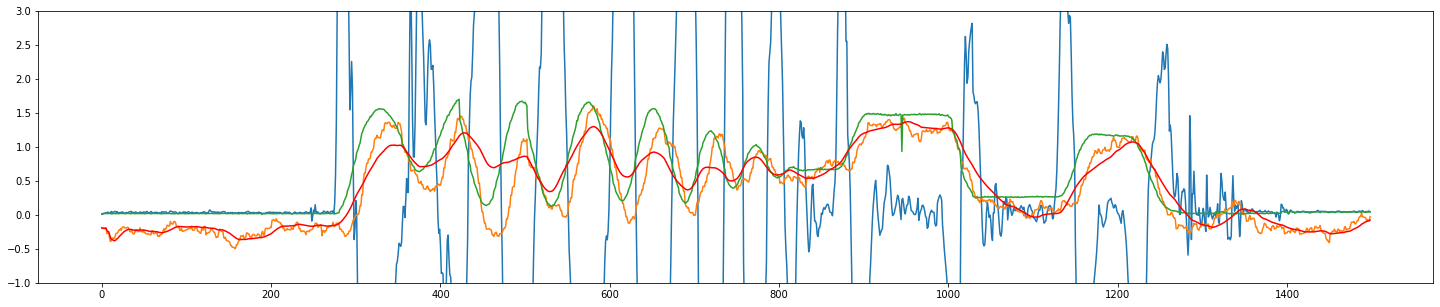

In [12]:
from filterpy.kalman import KalmanFilter

PERIOD = 0.025

COVARIANCE = 0.01

BARO_VAR = 0.005 * 0.005
ACC_VAR  = 0.01 * 0.01

f = KalmanFilter(dim_x=2, dim_z=1, dim_u=1)
f.x = np.array([0., 0.])                            # Initial state
f.B = np.array([PERIOD * PERIOD / 2, PERIOD])       # Control matrix
f.F = np.array([[1., PERIOD], [0., 1.]])            # State evolution matrix
f.H = np.array([[1.,0.]])                           # Observation matrix
f.P *= COVARIANCE                                   # Covariance matrix

print(f.P)

f.R = np.array(BARO_VAR)                            # Measure noise matrix
f.Q = np.array([[ACC_VAR * (PERIOD ** 4) / 4,       # Process noise matrix
                 ACC_VAR * (PERIOD ** 3) / 2],
                [ACC_VAR * (PERIOD ** 3) / 2,
                 ACC_VAR * (PERIOD ** 2)]])

z_predict = np.zeros(len(data))

for i in range(len(data)):
    f.predict(u=data['sensors.accelerometer.vertical'][i])
    f.update(z=np.array([data['sensors.barometer.height'][i]]))
    z_predict[i] = f.x[0]

fig, ax = plt.subplots()
fig.set_size_inches(25, 5)
ax.set_ylim([-1., 3.])
ax.plot(data['sensors.accelerometer.vertical'])
ax.plot(data['sensors.barometer.height'])
ax.plot(data['sensors.ultrasound.height'])
ax.plot(z_predict, 'r')
plt.show()
